# Regresión

## Introducción

In [1]:
import random
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})

Un modelo de regresión es un modelo matemático que busca determinar la relación entre una variable dependiente (Y), con respecto a otras variables, llamadas explicativas o independientes (X). **La variable dependiente debe ser una variable cuantitativa.** En el caso de regresión de Poisson puede ser una variable discreta, pero para la mayoría de casos (y a no ser que indiquemos lo contrario) Y debe ser una variable continua.

Para que la regresión obtenga resultados lógicos debe existir esa correlación entre X e Y, para nostros eso significa poder expresar la variable dependiente de la siguiente forma $Y=g(X) + \epsilon $. 

$g(⋅)$ es una [función](https://www.profesorenlinea.cl/matematica/Funciones_matematicas.html#:~:text=En%20matem%C3%A1tica%2C%20una%20funci%C3%B3n%20(f,tambi%C3%A9n%20llamado%20rango%20o%20%C3%A1mbito%20), como por ejemplo $g(X) = X^2$ o $g(X)=3X+2$. Se podría argumentar que a entrenar un modelo de regresión nuestro objetivo es calcular esta función.

$\epsilon$ es un error. Estos errores pueden existir por miles de motivos, todos igual de molestos. La existencia de estos errores es lo que evita que nuestros modelos no sean perfectos.

Veamoslo visualmente:

In [2]:
X=np.arange(0,1,0.005)
def g(x):
  return 3*x+2
Y=[g(x) +random.uniform(-1,1) for x in X]

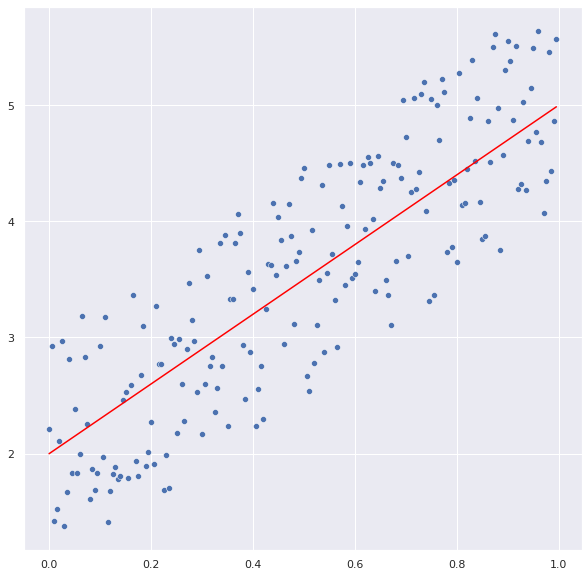

In [3]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=g(X), color='red')

En el ejemplo anterior nuestra función $g(x)=3x+2$ y $\epsilon$ es un número aleatorio entre -1 y 1. 
Digamos que ahora queremos predecir el valor que tendría un nuevo punto en esa gráfica, un punto $x=0.5$ por ejemplo. A ojo, podría tomar valores entre 2.5 y 4.5 esto se debe al error implementado, pero puestos a predecir predeciremos el valor $g(0.5)=3.5$. En la práctica no sabemos estos errores en que rango se encuentran, ni la varianza que tienen, ni nada, por tanto no podemos basarnos en ellos para realizar la predicción, nuestra mejor opción es predecir el valor de la función. Que sucede, que en la práctica tampoco conocemos cual es esta función, nuestra mejor opción es aproximar esa función.

### Ejercicio 1

Utilizando el código anterior crea una muestra utilizando la X anterior y la función $g(x)=(x-0.5)^2$. Realiza la gráfica de la función.

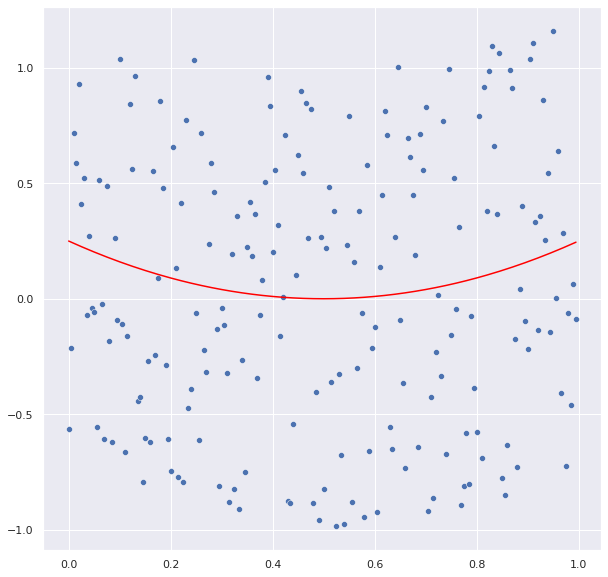

In [4]:
def g(x):
  return (x - 0.5)**2
Y=[g(x) +random.uniform(-1,1) for x in X]
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=g(X), color='red')

Intenta razonar si la regresión lineal será una buena opción para predecir los datos anteriores.

*No será una buena opción ya que, como podemos observar, los datos no siguen una tendecia lineal es decir, una recta.*

***

## MSE

Supongamos que tenemos el siguiente conjunto de datos aleatorios y que desconocemos como han sido generados.

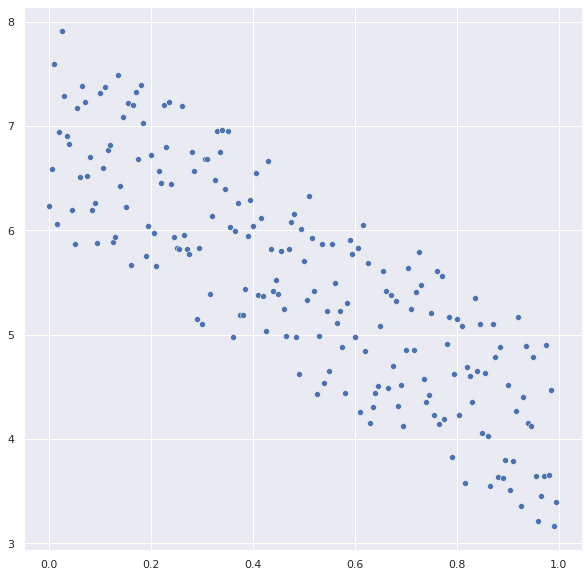

In [5]:
X=np.arange(0,1,0.005)
def g(x):
  return -3*x+7
Y=[g(x) +random.uniform(-1,1) for x in X]
sns.scatterplot(x=X,y=Y)

Pero, a ojo de buen cubero, somos capaces de distinguir que es una recta que decrece, así que mágicamente intuímos que puede ser una de las siguientes: $f_1(x)= -2.8*x+6.9$ o $f_2(x)=-3.2*X+7.1$ 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


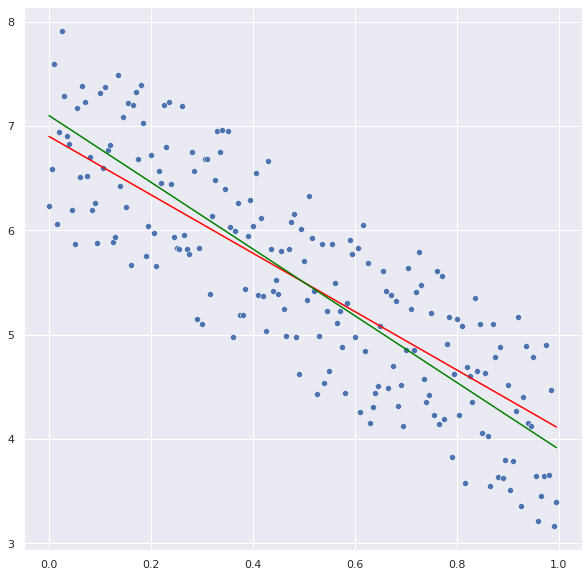

In [6]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(X,-2.8*X+6.9,color='red')
sns.lineplot(X,-3.2*X+7.1,color='green')

Sabemos, aunque no deberíamos, que ninguna de las dos es nuestra función $f$ ¿Pero cual de las dos es una mejor aproximación a $f$?
Para ello vamos a definirnos el $MSE$

***

$MSE$ son las siglas de Mean o Squared Error, es decir, la media de los errores al cuadrado, visto así podemos tener una intuícion de que es exatamente. Los errores de una regresión són $y_i - \widehat{y}_i$, donde $y_i$ es el valor real asociado a $x_i$ y $\widehat{y}$ es nuestra aproximación. Visualmente:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


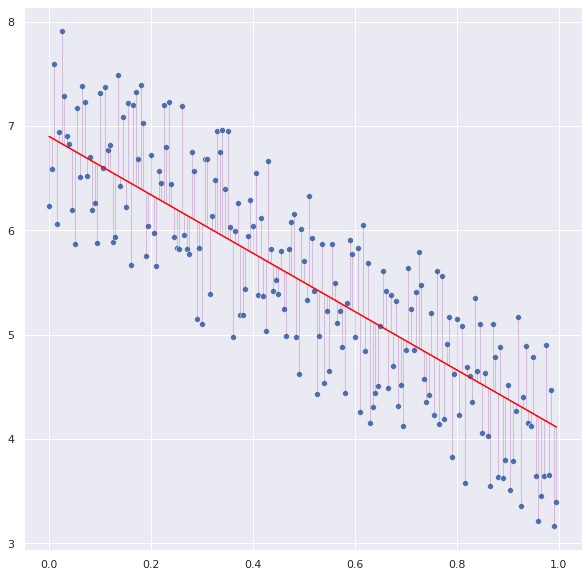

In [7]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(X,-2.8*X+6.9,color='red')
for i in range(0,len(X)):
  sns.lineplot(x=[X[i],X[i]],y=[Y[i],-2.8*X[i]+6.9],color='purple')

Las lineas moradas son los erroes (para ser exactos la longitud de cada linea). Ahora que tenemos los errores falta la parte de elevarlos al cuadrado,$(y_i - \widehat{y}_i)^2$, y calcular la media, $$MSE=\frac{1}{N} \sum_{i=0}^{N} (y_i - \widehat{y}_i)^2 = \frac{1}{N} \sum_{i=0}^{N} (y_i - f(x_i))^2  $$
Calculemos los $MSE$ de las anteriores predicciones:

In [8]:
MSE1=sum((Y-(-2.8*X+6.9))**2)/len(X)
MSE2=sum((Y-(-3.2*X+7.1))**2)/len(X)
print(MSE1,MSE2)

0.3370427343013457 0.3297565269264109


### Ejercicio 2

Intenta encontrar una función cuyo MSE sea mas pequeño, calculalo y realiza la gráfica de la funcion. 

In [9]:
MSE3=sum((Y-(-3*X+7))**2)/len(X)

print(MSE3)

#Esta debería ser aquella con menor MSE pero no es el caso por los errores.
#Estos errores afectan a la hora de calcular nuestras métricas 
#por lo que es posible que incluso la que esperabamos que fuese la mejor aproximación no lo sea.
#Por tanto, encontrar esta función no es sencillo. Veamos en la siguiente sección como hacerlo.

0.3300661306138783


## Buscando $f(x)$

Dado que el $MSE$ es un error, nuestro objetivo va a ser minimizar dicho error, para ello debemos encontrar una función $f(x)$ que se ajuste bien a los datos.
Vamos a ver dos formas de hacer esta busqueda: con curve_fit y con scikit.learn 
***

### Curve_fit

Recordemos un poco los datos con los que estamos trabajando:

(el código comentado es un recordatorio ya que ha sido ejecutado con anterioridad)(también es una ayuda en el ejercicio)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


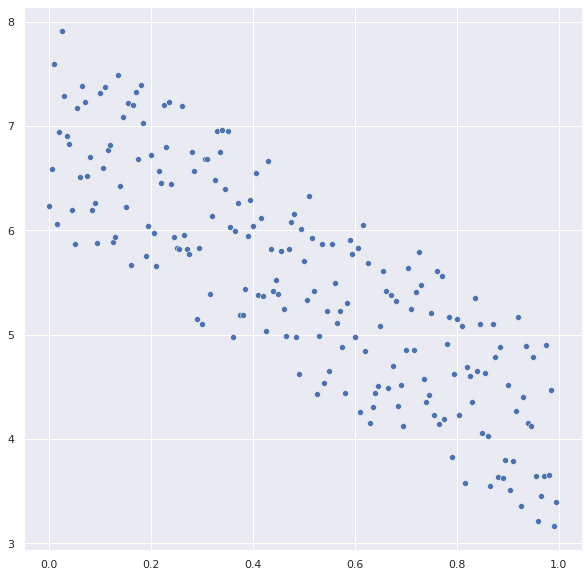

In [10]:
#X=np.arange(0,1,0.005)
#def g(x):
#  return 3*x+2
#Y=[g(x) + random.uniform(-1,1) for x in X]#
sns.scatterplot(X,Y)

Primero utilizaremos curve_fit, una función de la librería scipy, asi que habrá que importarla.

In [11]:
from scipy.optimize import curve_fit

El funcionamiento de curve_fit es el siguiente: nos creamos una función $f(x)$ que tendrá ciertos parámetros $a,b,c...$ y la función curve_fit se encarga de buscar los mejores parámetros para que el $MSE$ sea mínimo. Para ello, le debemos dar a la función curve_fit nuestra función arbitaria, X,Y y un valor inicial de los parámetros $a,b,c...$ estos ultimos en forma de lista. La función curve_fit nos devuelve popt y pcov, que son los parámetros optimos y la matriz de covarianzas, siendo la segunda innecesario explicarla en este momento. Veamoslo en práctica:

In [12]:
def f(x,a,b):
  return a*x +b

En este punto nos hemos definido $f$ en forma general. Ahora toca ajustar los parámetros:

In [13]:
popt,pcov=curve_fit(f,X,Y,p0=[0,0])
print(popt)
a_opt,b_opt=popt

[-3.10939336  7.05117295]


Obtenidos los parámetros optimos podemos realizar la gráfica y calcular el $MSE$

MSE:0.32905834931807443


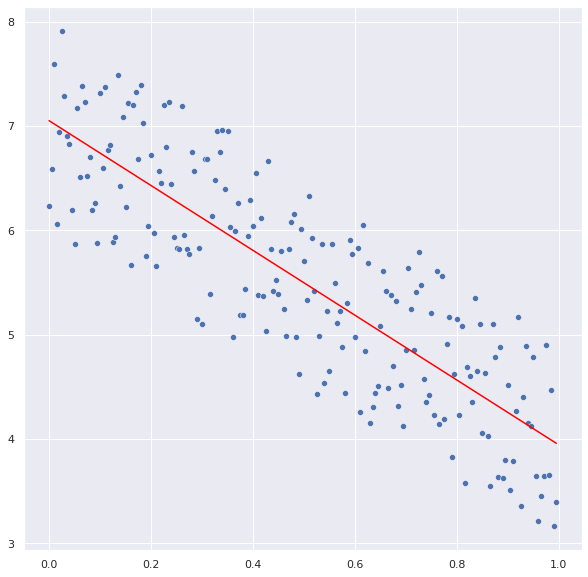

In [14]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=f(X,a_opt,b_opt),color="red")
MSE=sum((Y-f(X,a_opt,b_opt))**2)/len(X)
print(f"MSE:{MSE}")

Veamos que para usar curve_fit debemos tener una idea de la función $f(x)$ ya que nos ajusta los parámetros pero no nos "crea" la función de cero. Esto es así en general, debemos tener una idea de la forma de los datos para saber que tipo de regresión aplicar.

En este caso la función $f(x)=ax+b$ es una recta, por lo que hemos realizado regresión lineal. Veamos ahora un ejemplo de regresión exponencial y la imporancia de elegir un modelo correcto.

### Ejercicio 3

Basandote en el código anterior:
1. Crea una muestra de datos (Y) utilizando el X entre 0 y 5, con espacio 0.1, y el epsilon anterior y  $g(x)= e^{x}+2$. 
2. Calcula los valores óptimos de una regresión lineal mediante curve_fit. 
3. Calcula el MSE y representa gráficamente la aproximación. ¿Dirías que es una buena aproximación?


In [15]:
#Recuerda que e es una constante con valor 2.7182...
import math
print(math.e)

2.718281828459045


In [16]:
X=np.arange(0,5,0.1)
def g(x):
  return math.e**x + 2
Y=[g(x) +random.uniform(-1,1) for x in X]

In [17]:
popt,pcov=curve_fit(f,X,Y,p0=[0,0])
print(popt)
a_opt,b_opt=popt

[ 20.63061095 -20.51872227]


MSE:315.76987154540245


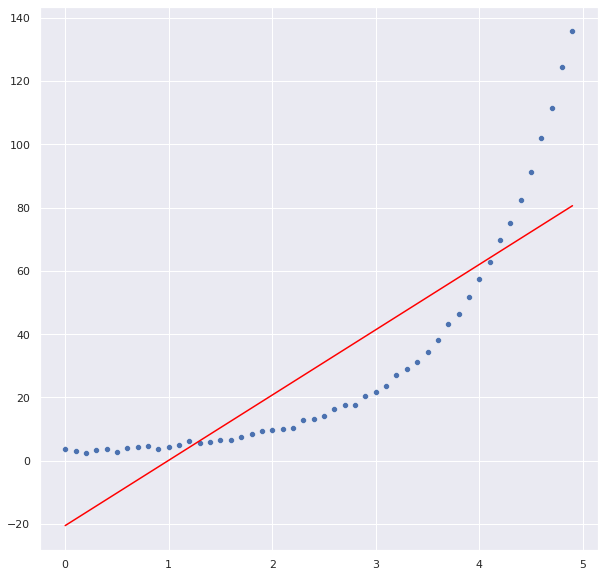

In [18]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=f(X,a_opt,b_opt),color="red")
MSE=sum((Y-f(X,a_opt,b_opt))**2)/len(X)
print(f"MSE:{MSE}")

4. Crea una nueva función genérica $f_2(x)=a e^{(bx)}+c$
5. Ajusta esta nueva función mediante curve_fit
6. Calcula el MSE y representa gráficamente la aproximación. ¿Dirías que es una mejor aproximación?

In [19]:
def f2(x,a,b,c):
  return a * math.e**(b*x) + c

In [20]:
popt,pcov=curve_fit(f2,X,Y,p0=[0,0,0])
print(popt)
a_opt,b_opt,c_opt=popt

[1.00497978 0.99878215 1.98992246]


MSE:0.3254625118941197


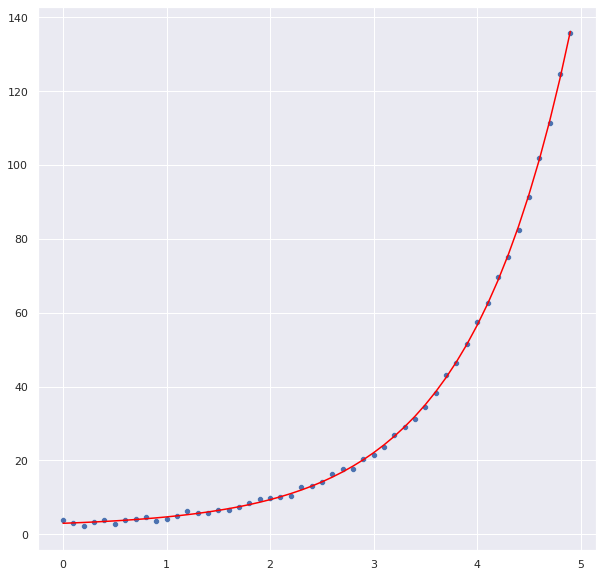

In [21]:
sns.scatterplot(x=X,y=Y)
sns.lineplot(x=X,y=f2(X,a_opt,b_opt,c_opt),color="red")
MSE=sum((Y-f2(X,a_opt,b_opt,c_opt))**2)/len(X)
print(f"MSE:{MSE}")

### Scikit-learn

Funcionamiento básico de Scikit-learn. Hagamos un reapaso rápido:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


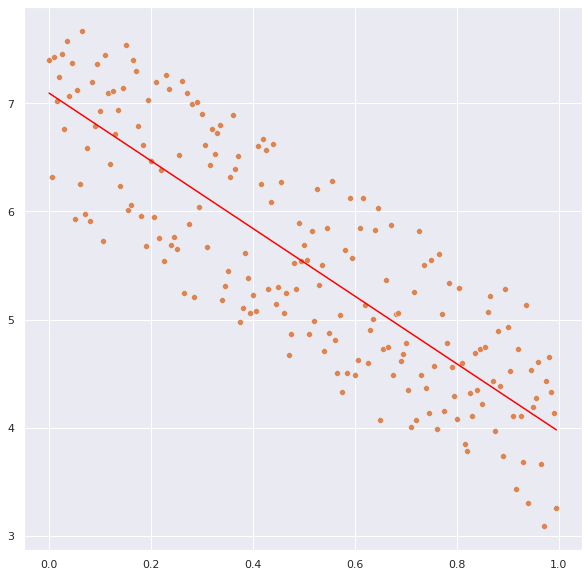

In [22]:
from sklearn.linear_model import LinearRegression

X=np.arange(0,1,0.005)
def g(x):
  return -3*x+7
Y=[g(x) +random.uniform(-1,1) for x in X]
sns.scatterplot(x=X,y=Y)
#Crea el modelo model = LinearRegression()
model = LinearRegression()
#Entrena el modelo model.fit(X.reshape(-1, 1),Y)
model.fit(X.reshape(-1, 1),Y)

sns.scatterplot(X,Y)
sns.lineplot(X,model.predict(X.reshape(-1,1)), color="red")

Aclaración sobre el código anterior. X es un array creado por numpy de una sola dimensión, como una matriz de una sola fila. Para ejecutar las funciones de Scikit-learn debe ser una lista de listas, de ahí que utilicemos la función de numpy .reshape(-1,1). Con dicha función lo que estamos diciendole es que nos transforme la fila en un número indefinido de filas (-1) y (1) columna, creando en el proceso una lista de lista. Puede resultar confuso al principio, pero veamos la diferencia:

In [23]:
print(f"Esto es X: {X}")
print(f"Esto es X.reshape: {X.reshape(-1,1)}")

Esto es X: [0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 0.8

Volviendo a la regresión, observemos que hemos aplicado una regresión lineal. Comparado con curve_fit el código es mas sencillo y rápido, a cambio es algo menos personalizable. Si nos ponemos en del ejercicio 3 necesitaríamos realizar una regresión exponencial, algo que no esta predefinido en Scikit-learn, por lo que deberíamos optar por otros métodos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

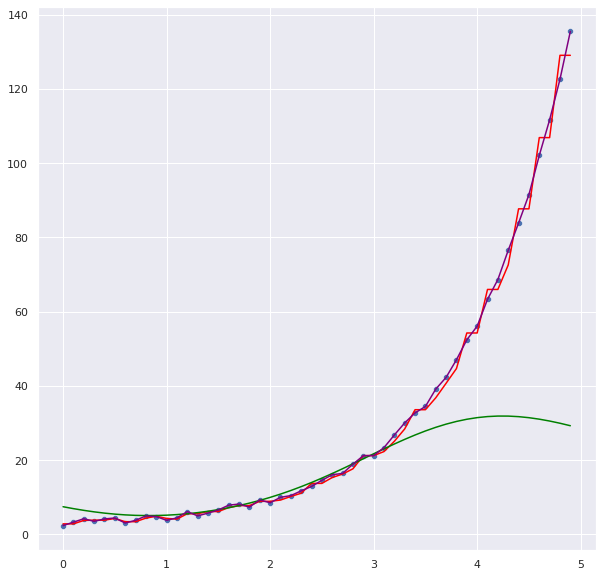

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

X=np.arange(0,5,0.1)
def g(x):
  return math.e**(x)+2
Y=[g(x) + random.uniform(-1,1) for x in X]

model1 = KNeighborsRegressor(n_neighbors=2)
model2 = SVR()
# Crea un model3 que realice regresión mediante árboles de decisión. model3 = DecisionTreeRegressor()
model3 = DecisionTreeRegressor()

sns.scatterplot(X,Y)

model1.fit(X.reshape(-1, 1),Y)
sns.lineplot(X,model1.predict(X.reshape(-1,1)), color="red")

model2.fit(X.reshape(-1, 1),Y)
sns.lineplot(X,model2.predict(X.reshape(-1,1)), color="green")

#Entrena el model 3 model3.fit(X.reshape(-1, 1),Y)
model3.fit(X.reshape(-1, 1),Y)
#Realiza la gráfica del model3. sns.lineplot(X,model3.predict(X.reshape(-1,1)), color="purple")
sns.lineplot(X,model3.predict(X.reshape(-1,1)), color="purple")

Como hemos observado es muy sencillo cambiar de modelo y probar diferentes técnicas que no solo funcionan ajustando una funcion predefinida. Ahí es donde reside el poder de Scikit-learn y por eso lo vamos a utilizar para hacer machine learning. El primer modelo implementado ha sido el de la regresión lineal simple, el mas sencillo posible. 
